Imprting necessary python libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("Website_Traffic.csv")
print(data.head())

  Session primary channel group (Default channel group)  \
0                                             Direct      
1                                     Organic Social      
2                                             Direct      
3                                     Organic Social      
4                                     Organic Social      

   Date + hour (YYYYMMDDHH)  Users  Sessions  Engaged sessions  \
0                2024041623    237       300               144   
1                2024041719    208       267               132   
2                2024041723    188       233               115   
3                2024041718    187       256               125   
4                2024041720    175       221               112   

   Average engagement time per session  Engaged sessions per user  \
0                            47.526667                   0.607595   
1                            32.097378                   0.634615   
2                            39.939914   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Session primary channel group (Default channel group)  3182 non-null   object 
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   int64  
 2   Users                                                  3182 non-null   int64  
 3   Sessions                                               3182 non-null   int64  
 4   Engaged sessions                                       3182 non-null   int64  
 5   Average engagement time per session                    3182 non-null   float64
 6   Engaged sessions per user                              3182 non-null   float64
 7   Events per session                                     3182 non-null   float64
 8   Engagement rate                                 

In [6]:
print(data.describe())

       Date + hour (YYYYMMDDHH)        Users     Sessions  Engaged sessions  \
count              3.182000e+03  3182.000000  3182.000000       3182.000000   
mean               2.024043e+09    41.935889    51.192646         28.325581   
std                2.695099e+03    29.582258    36.919962         20.650569   
min                2.024041e+09     0.000000     1.000000          0.000000   
25%                2.024041e+09    20.000000    24.000000         13.000000   
50%                2.024042e+09    42.000000    51.000000         27.000000   
75%                2.024043e+09    60.000000    71.000000         41.000000   
max                2.024050e+09   237.000000   300.000000        144.000000   

       Average engagement time per session  Engaged sessions per user  \
count                          3182.000000                3182.000000   
mean                             66.644581                   0.606450   
std                             127.200659                   0.264023

In [7]:
data['Date + hour (YYYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

# group data by date and sum up the users and sessions
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

1. Converting a datetime column: Transforms 'Date + hour (YYYYMMDDHH)' from what appears to be a string format (YYYYMMDDHH) to a proper datetime object

2. Converting numeric columns: Changes 'Users' and 'Sessions' columns to numeric data types

3. Data aggregation:
- Groups the data by the datetime column
- Calculates the sum of both Users and Sessions for each unique datetime
- Creates a new DataFrame 'grouped_data' with these aggregated results

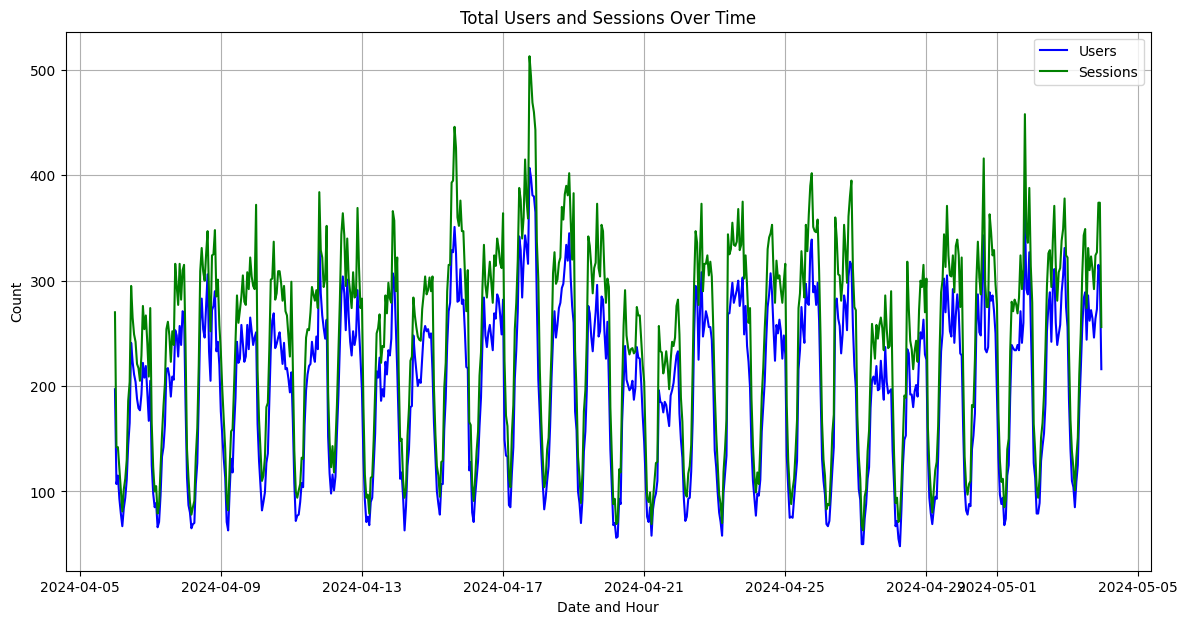

In [8]:
# plotting the aggregated users and sessions over time
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label='Users', color='blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color='green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

From the graph we can observe that:

1. Pattern Relationship: There's a consistent correlation between Users (blue) and Sessions (green) lines. Sessions are consistently higher than Users, indicating that some users have multiple sessions. The ratio between Sessions and Users appears relatively stable.

2. Daily Patterns: Clear cyclical patterns are visible, likely representing daily usage cycles. Regular peaks and troughs occur, with lows typically reaching around 100 users. Peak activity generally reaches between 300-400 users, with occasional spikes above 400.

3. Notable Events: A significant spike occurs around April 17th, reaching approximately 500 sessions and 400 users. Several other notable peaks appear around April 29th and May 3rd. The overall pattern maintains consistency despite these occasional spikes.

4. Usage Trends: No clear long-term upward or downward trend is visible over this one-month period. The baseline activity remains relatively stable throughout the period. Activity patterns appear to be more influenced by time of day than by the day of the week.

5. System Load: The system consistently handles between 100-500 concurrent sessions. The ratio of sessions to users suggests each active user maintains roughly 1.2-1.5 sessions on average. Traffic patterns are predictable with occasional unexpected surges.

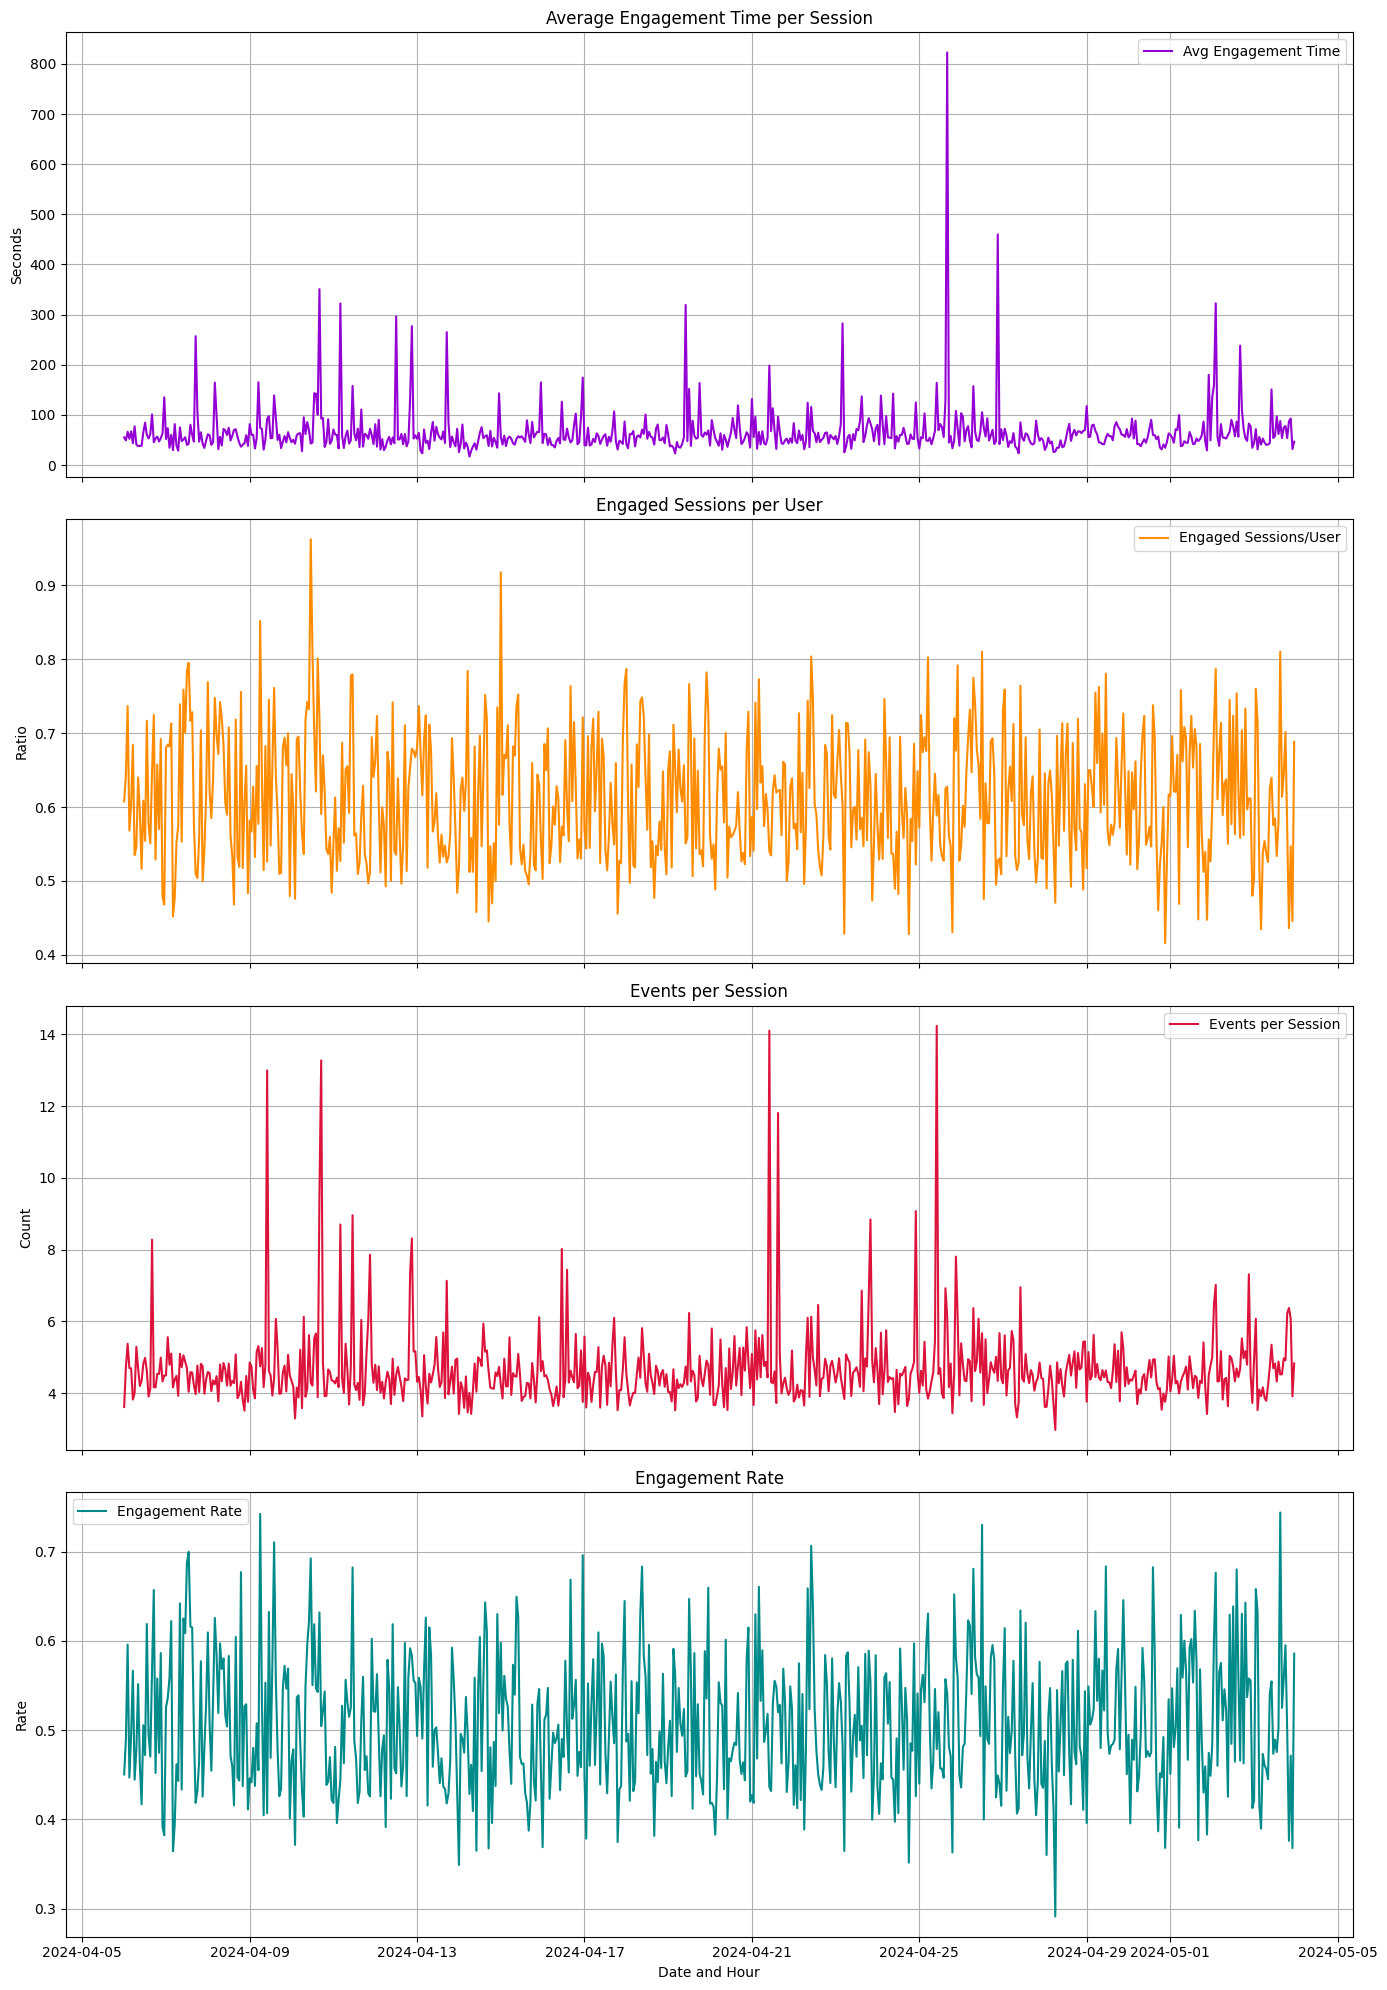

In [9]:
# convert relevant columns to numeric for engagement analysis
data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

# group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

# plotting engagement metrics
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='darkviolet')
ax[0].set_title('Average Engagement Time per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='darkorange')
ax[1].set_title('Engaged Sessions per User')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per Session', color='crimson')
ax[2].set_title('Events per Session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement Rate', color='darkcyan')
ax[3].set_title('Engagement Rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

The user engagement analysis provides insights into how visitors interact with the website:

Based on these four engagement metrics visualized from April 5th to May 5th, 2024, here are the key observations:

1. Average Engagement Time per Session:
- The baseline engagement time typically ranges between 50-100 seconds per session
- Several notable spikes occur, with the most significant reaching about 800 seconds (≈13 minutes) around April 25th
- Occasional peaks of 200-300 seconds appear throughout the period
- The pattern suggests most users have relatively brief interactions with occasional extended sessions

2. Engaged Sessions per User:
- The ratio consistently fluctuates between 0.5 and 0.8 engaged sessions per user
- A few notable spikes reach above 0.9, particularly around April 9th
- The metric rarely drops below 0.5, indicating a relatively stable base of engaged users
- No clear trend of improvement or decline over the month

3. Events per Session:
- The baseline shows around 4-5 events per session consistently
- Several significant spikes reach 12-14 events per session
- Major spikes align with periods of higher engagement time
- The pattern suggests most users perform a consistent number of actions during regular sessions

4. Engagement Rate:
- Fluctuates primarily between 0.4 and 0.6 (40-60%)
- Shows consistent daily variations
- Occasional peaks reach around 0.7 (70%)
- Demonstrates relatively stable engagement with no significant declining or improving trend


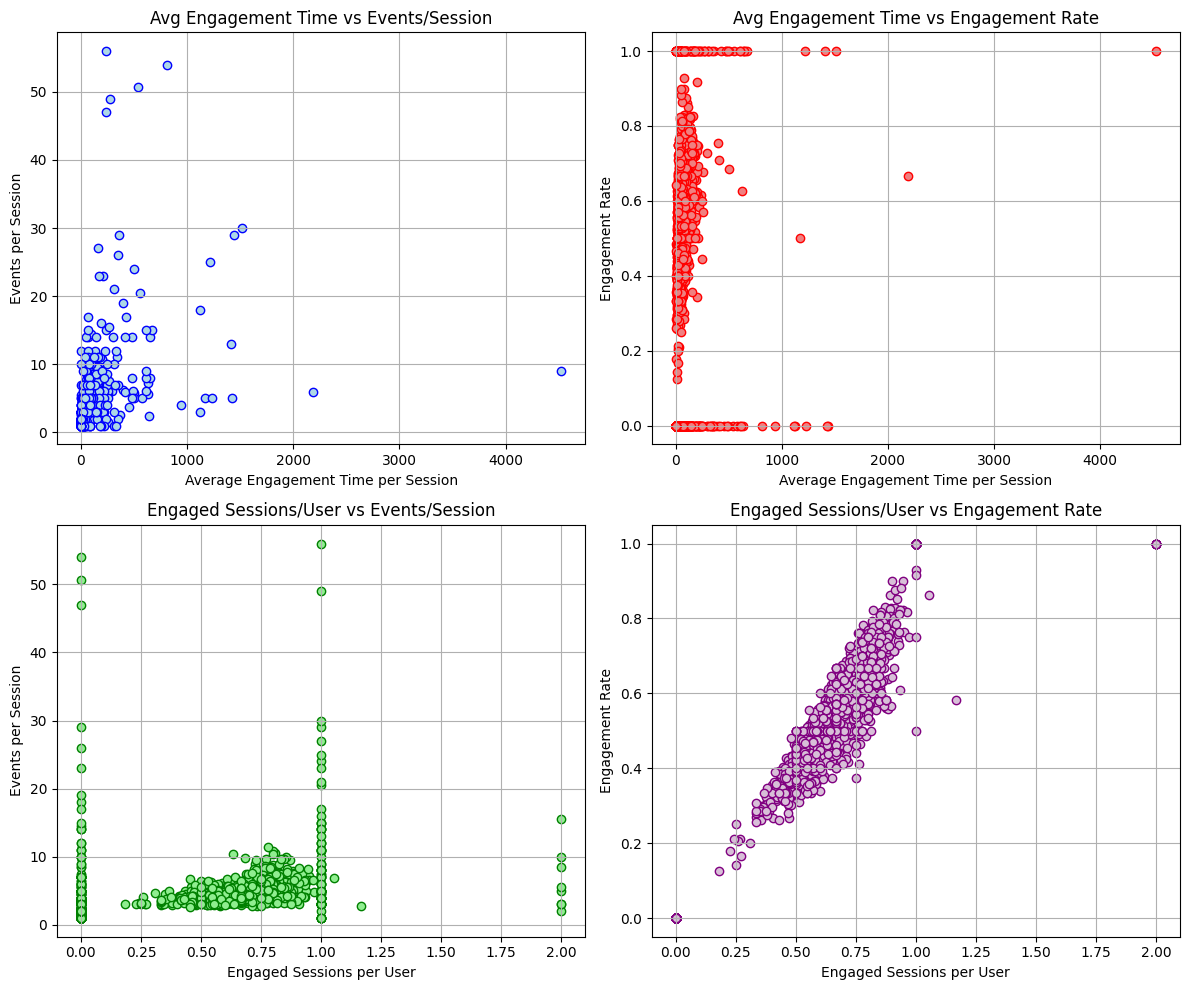

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='lightblue', edgecolor='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True)  # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='lightcoral', edgecolor='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement Rate')
axes[0, 1].grid(True)

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='lightgreen', edgecolor='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engaged Sessions per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True)

# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='thistle', edgecolor='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement Rate')
axes[1, 1].set_xlabel('Engaged Sessions per User')
axes[1, 1].set_ylabel('Engagement Rate')
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()

Based on these scatter plots analyzing relationships between different engagement metrics the key observations are:

1. Average Engagement Time vs Events/Session:
- There's a positive correlation between engagement time and events per session
- Most sessions cluster in the lower range (0-1000 seconds) with 0-10 events
- Some outliers show very high engagement (3000-4000 seconds) with relatively few events
- A few sessions show high event counts (40-50 events) with moderate engagement time

2. Average Engagement Time vs Engagement Rate:
- The relationship shows an interesting binary pattern
- Many sessions cluster at either very high (≈1.0) or very low (≈0) engagement rates
- The distribution suggests a clear distinction between highly engaged and non-engaged sessions
- Longer engagement times don't necessarily correlate with higher engagement rates

3. Engaged Sessions/User vs Events/Session:
- Most data points cluster between 0.5-1.0 engaged sessions per user
- The highest concentration of events occurs when users have around 1 engaged session
- There are several outliers showing very high event counts (40-50 events)
- Some users with low engaged sessions still show moderate event activity

4. Engaged Sessions/User vs Engagement Rate:
- Shows a strong positive correlation
- Forms a clear linear trend from bottom-left to top-right
- The relationship suggests that users with more engaged sessions consistently show higher engagement rates
- The density is highest in the middle range (0.5-0.8 engaged sessions, 0.4-0.7 engagement rate)

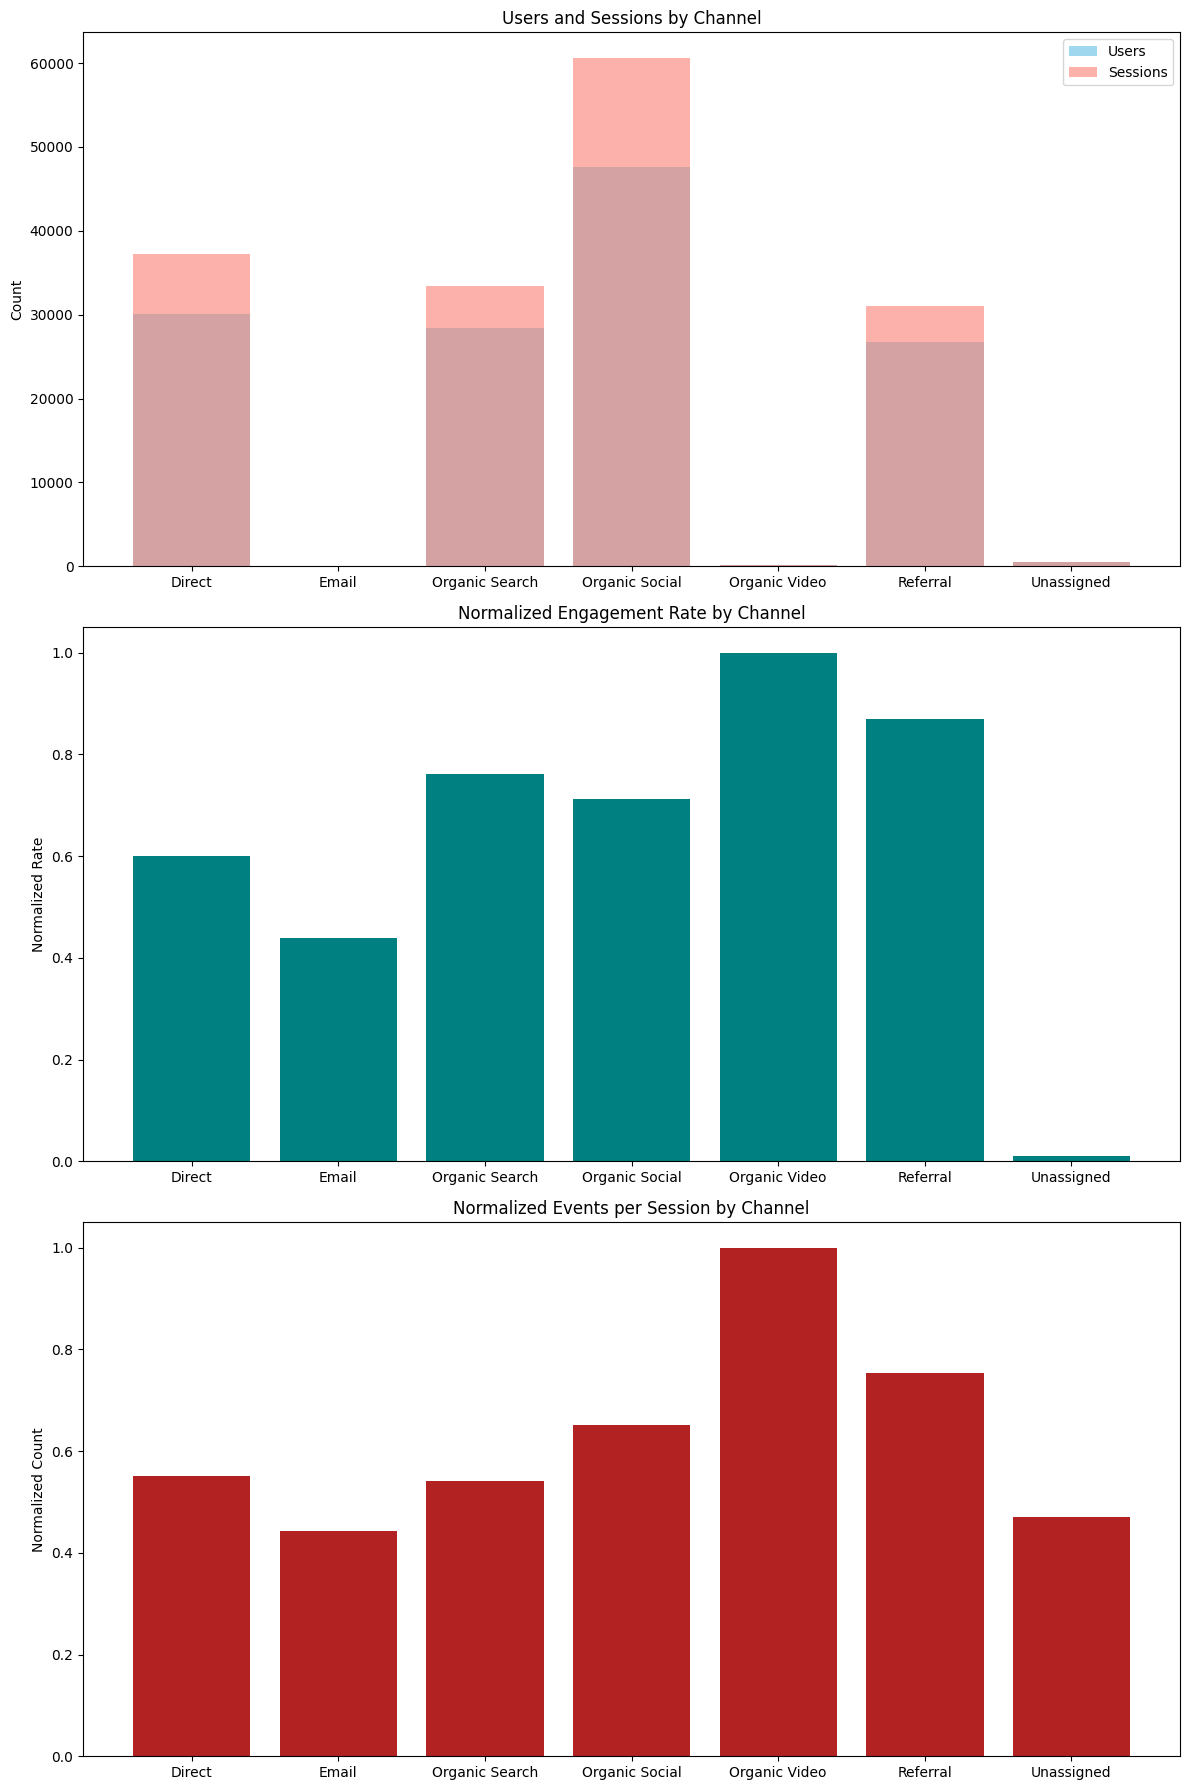

In [12]:
# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', color='skyblue', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label='Sessions', color='salmon', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='teal')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')

# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='firebrick')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()

Based on these channel performance visualizations:-

1. Users and Sessions by Channel:
- Organic Social dominates with approximately 60,000 sessions and 45,000 users
- Direct and Organic Search show similar volumes (around 35,000 sessions each)
- Referral traffic generates about 30,000 sessions
- Email and Organic Video show minimal traffic
- There's a consistent gap between users and sessions across all channels, indicating repeat visits

2. Normalized Engagement Rate by Channel:
- Organic Video leads with the highest engagement rate (1.0 normalized)
- Referral traffic shows strong engagement (0.85 normalized)
- Organic Search and Organic Social show moderate engagement (0.75-0.7 normalized)
- Direct traffic has lower engagement (0.6 normalized)
- Email shows the lowest engagement rate (0.4 normalized)

3. Normalized Events per Session by Channel:
- Organic Video again leads with the highest events per session (1.0 normalized)
- Referral traffic maintains strong performance (0.75 normalized)
- Organic Social shows moderate activity (0.65 normalized)
- Direct and Organic Search have similar activity levels (0.55 normalized)
- Email and Unassigned channels show the lowest activity (0.4-0.45 normalized)

<ipython-input-18-aac28beb0f1a>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
<ipython-input-18-aac28beb0f1a>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')


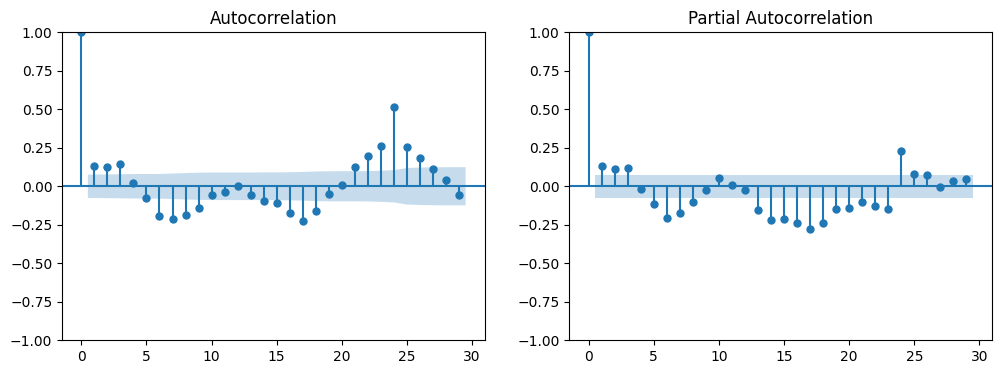

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

# plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

Based on the Autocorrelation (ACF) and Partial Autocorrelation (PACF) plots of the differenced sessions data:-

Autocorrelation Function (ACF):


Shows a clear cyclical pattern with peaks around lag 24
The strongest positive correlation is at lag 24 (approximately 0.5)
Several smaller positive correlations at lags 1-3
Negative correlations between lags 5-20
The pattern suggests a daily (24-hour) seasonality in the data


Partial Autocorrelation Function (PACF):


Strong spike at lag 1 (about 0.15)
Few significant correlations at lags 2-3
Mostly negative correlations between lags 10-20
Less pronounced cyclical pattern compared to ACF
Suggests direct dependencies are strongest at immediate lags

<ipython-input-19-d358d4f09b8d>:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
<ipython-input-19-d358d4f09b8d>:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
<ipython-input-19-d358d4f09b8d>:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')


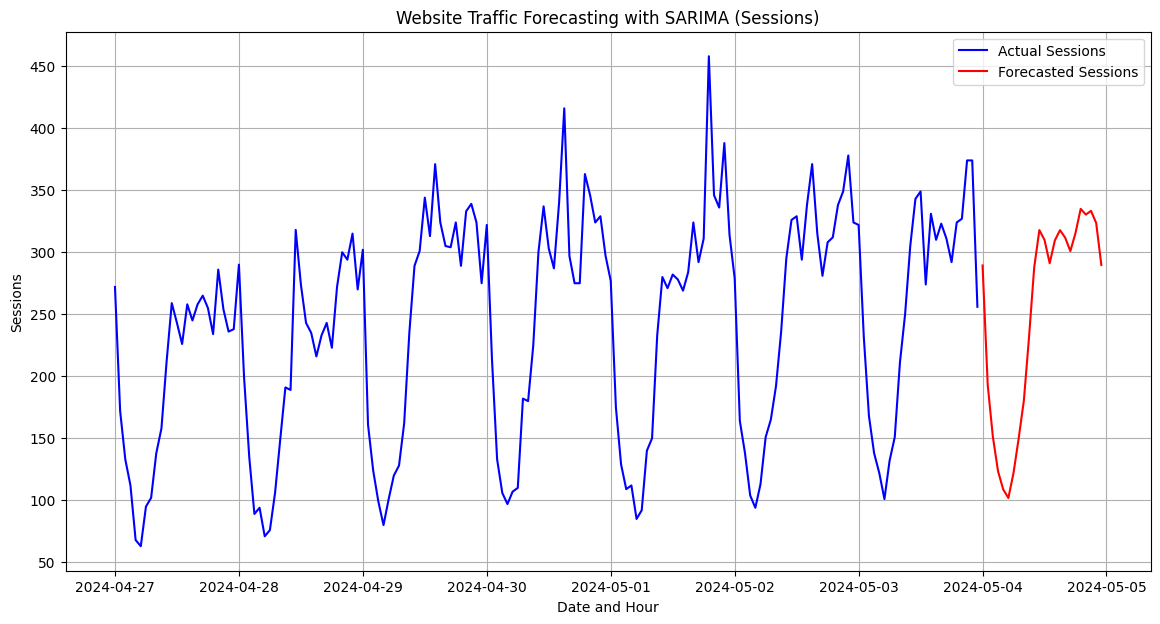

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24


sarima_model = SARIMAX(time_series_data,
                      order=(1, 1, 1),
                      seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)

# plotting the actual data and the SARIMA forecast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data[-168:], label='Actual Sessions', color='blue')  # last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()

Based on the SARIMA (Seasonal ARIMA) model forecast for website sessions:

1. Model Performance: The SARIMA model (1,1,1)×(1,1,1,24) appears to capture the main patterns in the data. The forecast (red line) follows the established cyclical pattern. The model recognizes both the daily seasonality and the overall trend

2. Historical Pattern Analysis:
- Clear daily cycles with peaks and troughs
- Session counts typically range from 100 to 400
- Several notable spikes reaching above 400 sessions
- Consistent daily minimum around 75-100 sessions
- Daily peaks typically occur at similar times
